In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
# 1. MENELAAH & MENVALIDASI DATA (Tahap 1 & 2)
# Memuat dataset [cite: 11]
df = pd.read_csv('Campus Recruitment.csv')

# Menampilkan informasi dasar dataset [cite: 22-37]
print("--- Info Dataset ---")
print(df.info())
print("\n--- Statistik Deskriptif ---")
print(df.describe())

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    

In [22]:
# 2. DATA CLEANING (Menelaah & Membersihkan Data)
# Isi nilai Gaji yang kosong dengan 0 (untuk yang tidak lulus penempatan)
df['Gaji'] = df['Gaji'].fillna(0)

In [23]:
# Imputasi nilai kosong pada kolom numerik dengan median dan kategorik dengan mode
df['Nilai rata-rata SMP'] = df['Nilai rata-rata SMP'].fillna(df['Nilai rata-rata SMP'].median())
df['Nilai rata-rata SMA'] = df['Nilai rata-rata SMA'].fillna(df['Nilai rata-rata SMA'].median())
df['Nilai tes kemampuan kerja'] = df['Nilai tes kemampuan kerja'].fillna(df['Nilai tes kemampuan kerja'].median())
df['Jenis Kelamin'] = df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0])

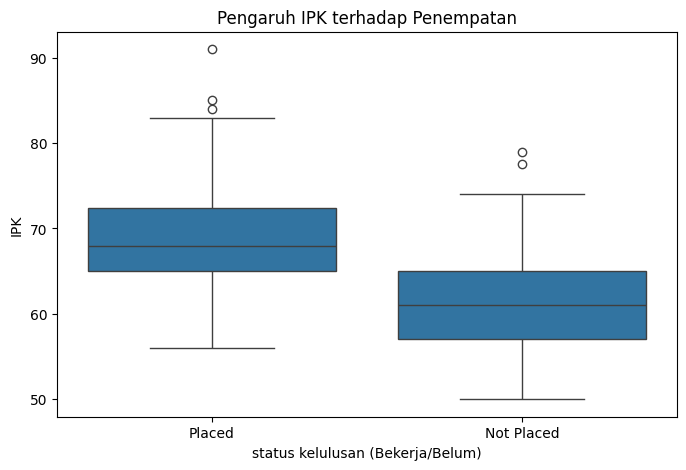

In [24]:
# 3. EDA (ANALISIS DATA EKSPLORATIF)
# Visualisasi pengaruh IPK terhadap status kelulusan
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='status kelulusan (Bekerja/Belum)', y='IPK')
plt.title('Pengaruh IPK terhadap Penempatan')
plt.show()

In [25]:
# 4. PREPROCESSING (Mengkonstruksi Data)
# Mengubah data teks menjadi angka (Label Encoding)
le = LabelEncoder()
categorical_cols = [
    'Jenis Kelamin', 'Lembaga pendidikan kelas 10', 'Lembaga pendidikan kelas 12',
    'Jurusan saat SMA', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus',
    'Pendidikan pascasarjana', 'status kelulusan (Bekerja/Belum)'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
# 5. MEMBANGUN MODEL (Random Forest)
# Menentukan fitur (X) dan target (y). Kolom ID dan Gaji dihapus dari fitur.
X = df.drop(['ID', 'status kelulusan (Bekerja/Belum)', 'Gaji'], axis=1)
y = df['status kelulusan (Bekerja/Belum)']

# Split data: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan Training Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# 6. EVALUASI
y_pred = model.predict(X_test)
print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 0.81

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



In [28]:
# 7. FEATURE IMPORTANCE (Melihat faktor paling berpengaruh)
importances = pd.DataFrame({'Fitur': X.columns, 'Kepentingan': model.feature_importances_})
importances = importances.sort_values(by='Kepentingan', ascending=False)
print("\nFaktor Paling Berpengaruh:\n", importances)


Faktor Paling Berpengaruh:
                              Fitur  Kepentingan
1              Nilai rata-rata SMP     0.303677
6                              IPK     0.194618
3              Nilai rata-rata SMA     0.156508
11    Nilai rata-rata pascasarjana     0.101276
9        Nilai tes kemampuan kerja     0.065227
4      Lembaga pendidikan kelas 12     0.051994
8   Pengalaman kerja sebelum lulus     0.035665
10         Pendidikan pascasarjana     0.024496
2      Lembaga pendidikan kelas 10     0.022870
0                    Jenis Kelamin     0.018783
5                 Jurusan saat SMA     0.015493
7            Program studi sarjana     0.009391
